# Hierarchial Clustering

In [2]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
Airlines= pd.read_csv("EastWestAirlines (1).csv")
Airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [11]:
Airlines.rename(columns = {'Award?':'Award'}, inplace = True)

In [12]:
Airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award              3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [9]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    print(x)
    return x

In [17]:
Airlines.iloc[:,1:]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [14]:
Airlines.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [16]:
def_norm = norm_func(Airlines.iloc[:,1:])

       Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0     0.016508         0.0       0.00        0.0        0.0     0.000660   
1     0.011288         0.0       0.00        0.0        0.0     0.000815   
2     0.024257         0.0       0.00        0.0        0.0     0.015636   
3     0.008667         0.0       0.00        0.0        0.0     0.001896   
4     0.057338         0.0       0.75        0.0        0.0     0.164211   
...        ...         ...        ...        ...        ...          ...   
3994  0.010837         0.0       0.00        0.0        0.0     0.032330   
3995  0.037766         0.0       0.00        0.0        0.0     0.003720   
3996  0.043169         0.0       0.50        0.0        0.0     0.096505   
3997  0.032202         0.0       0.00        0.0        0.0     0.001896   
3998  0.001769         0.0       0.00        0.0        0.0     0.000000   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0        0.

In [18]:
def_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


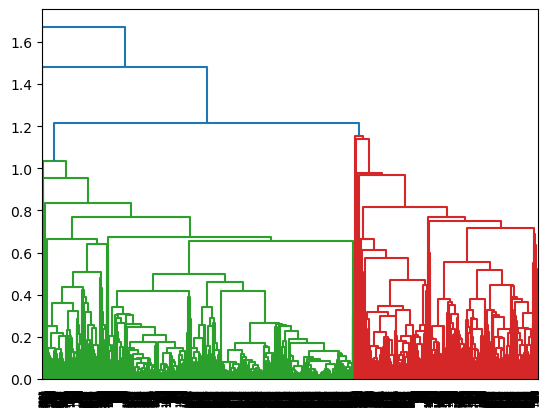

In [21]:
dendogram = sch.dendrogram(sch.linkage(def_norm,method='average'))

In [22]:
hc = AgglomerativeClustering(n_clusters=3,metric='euclidean',distance_threshold=None)

In [24]:
y_hc = hc.fit_predict(def_norm)

In [25]:
set(y_hc)

{0, 1, 2}

In [33]:
Airlines['h_clusteroid']=y_hc

In [34]:
Airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusteroid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [35]:
Airlines1 = Airlines.sort_values("h_clusteroid")
Airlines1

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusteroid
1999,2016,327126,1452,5,1,1,97997,25,350,3,4440,1,0
1459,1473,315273,0,1,1,1,12584,9,4084,4,5079,1,0
1455,1469,49438,0,4,1,1,33912,14,0,0,5085,1,0
3069,3091,105544,0,4,1,1,31001,16,500,1,2888,1,0
1452,1466,147822,0,4,1,1,42469,18,0,0,5107,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3341,3364,39566,0,2,1,1,23755,18,0,0,1763,0,2
3343,3366,41628,0,3,1,1,16771,12,0,0,1818,0,2
1057,1068,235567,0,3,1,1,16106,15,0,0,5728,0,2
1074,1085,70877,0,2,1,1,8956,15,0,0,5696,0,2


In [36]:
Airlines1.groupby("h_clusteroid").mean()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
h_clusteroid,,,,,,,,,,,,
0,1745.592843,97053.051317,240.196489,2.661715,1.015530,1.018231,28905.414585,15.782579,857.501013,2.599595,4625.062120,1.0
1,2312.702339,37876.890058,52.797076,1.000000,1.019883,1.000585,2558.508187,5.730994,239.314035,0.697076,3562.376608,0.0
2,1877.870050,106221.111386,161.262376,3.198020,1.001238,1.025990,26458.257426,16.363861,198.733911,0.558168,4367.250000,0.0


# K-Means Clustering

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans

In [38]:
Airlines = pd.read_csv("EastWestAirlines (1).csv")
Airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [43]:
Airlines.rename(columns = {'Award?':'Award'}, inplace = True)

In [44]:
Airlines.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [45]:
Airlines1 = Airlines.iloc[:,1:]

In [50]:
Airlines.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

In [55]:
Airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award              3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [65]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
Scaled_Airlines_df = pd.DataFrame(Scaler.fit_transform(Airlines.iloc[:,1:]),columns=['Balance','Qual_miles','cc1_miles','cc2_miles','cc3_miles',
                                                                                     'Bonus_miles','Bonus_trans', 'Flight_miles_12mo', 
                                                                                     'Flight_trans_12',
                                                                                     'Days_since_enroll', 'Award'])
Scaled_Airlines_df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918
3995,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918
3996,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918
3997,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919


[43988.999999999985, 35409.5166298613, 30906.110883899542, 27154.331168950815, 24541.471294111238, 21089.694784806925, 18891.92670311129, 17316.774877029922, 15961.476009310602]


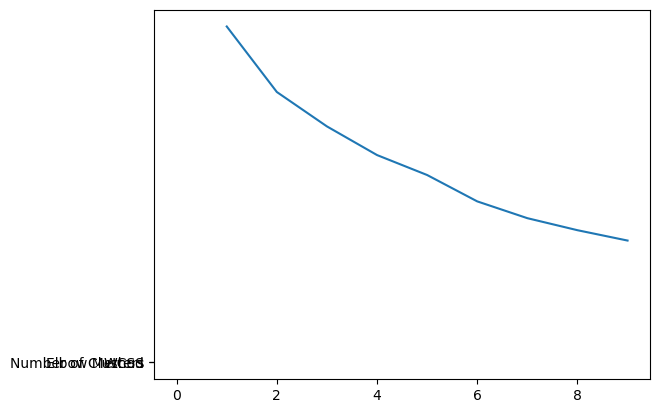

In [67]:
wcss=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(Scaled_Airlines_df)
    wcss.append(kmeans.inertia_)
print(wcss)
plt.plot(range(1,10),wcss)
plt.plot('Elbow Method')
plt.plot('Number of Clusters')
plt.plot('WCSS')
plt.show()

In [68]:
from sklearn.cluster import KMeans
cluster_new = KMeans(3,random_state=42)
cluster_new.fit(Scaled_Airlines_df)

KMeans(n_clusters=3, random_state=42)

In [70]:
cluster_new.labels_

array([1, 1, 1, ..., 0, 1, 1])

In [71]:
set(cluster_new.labels_)

{0, 1, 2}

In [72]:
Airlines['clusteroid_new']= cluster_new.labels_

In [73]:
Airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusteroid_new
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [74]:
Airlines.sort_values(by='clusteroid_new')

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusteroid_new
1999,2016,327126,1452,5,1,1,97997,25,350,3,4440,1,0
1388,1402,156041,0,2,1,1,5644,13,0,0,5324,1,0
1385,1399,14345,0,4,1,1,50752,16,0,0,5487,1,0
1384,1398,320997,2556,5,1,1,82255,24,0,0,5345,1,0
1382,1396,66516,0,4,1,1,45406,16,200,1,5311,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
958,969,13375,4301,4,1,1,15732,43,9200,28,5916,1,2
275,279,1704838,0,1,1,1,17108,32,4823,23,7283,1,2
2903,2925,2900,0,1,1,1,2900,29,2900,29,1804,0,2
662,671,109532,0,5,1,1,128048,53,7939,26,6372,1,2


In [76]:
cluster_new.cluster_centres_

AttributeError: 'KMeans' object has no attribute 'cluster_centres_'

In [79]:
Airlines.groupby('clusteroid_new').agg(['mean']).reset_index()

,clusteroid_new,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1600.939807,117635.571429,126.030498,3.744783,1.002408,1.036918,40624.182986,19.012039,333.447030,0.990369,4884.273676,0.649278
1,1,2233.072896,44429.433114,98.345483,1.237301,1.019000,1.000388,4854.212098,7.019775,198.970531,0.622334,3711.259791,0.205894
2,2,1743.660920,190656.775862,951.994253,2.178161,1.034483,1.011494,31181.005747,26.454023,5236.454023,15.252874,4672.270115,0.810345


In [80]:
Airlines[Airlines['clusteroid_new']==1]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusteroid_new
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,4016,3974,0,1,1,1,365,3,0,0,1397,0,1
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [81]:
Airlines[Airlines['clusteroid_new']==0]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusteroid_new
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
6,7,84914,0,3,1,1,27482,25,0,0,6994,0,0
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,0
11,12,96522,0,5,1,1,61105,19,0,0,6924,1,0
15,16,28495,0,4,1,1,49442,15,0,0,6912,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3979,4002,57793,0,3,1,1,20959,15,1198,3,1424,1,0
3980,4003,28867,0,3,1,1,19169,28,0,0,1425,0,0
3985,4008,59017,0,4,1,1,34746,25,0,0,1418,0,0
3991,4014,39142,0,3,1,1,14981,28,0,0,1408,0,0


In [82]:
from sklearn.metrics import silhouette_score
score = silhouette_score(Scaled_Airlines_df, cluster_new.labels_,metric='euclidean')
score

0.31110680893107867

In [83]:
Airlines1 = pd.DataFrame()
Airlines1['cluster_id']=cluster_new.labels_

In [84]:
Airlines1

,cluster_id
0,1
1,1
2,1
3,1
4,0
...,...
3994,1
3995,1
3996,0
3997,1


#DBSCAN 

# DBSCAN

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [91]:
Airlines = pd.read_csv("EastWestAirlines (1).csv")
Airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [92]:
Airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [93]:
Airlines.rename(columns = {'Award?':'Award'}, inplace = True)

In [95]:
Airlines.drop(['ID#'],axis=1,inplace=True)
Airlines

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [96]:
array=Airlines.values
array

array([[28143,     0,     1, ...,     0,  7000,     0],
       [19244,     0,     1, ...,     0,  6968,     0],
       [41354,     0,     1, ...,     0,  7034,     0],
       ...,
       [73597,     0,     3, ...,     0,  1402,     1],
       [54899,     0,     1, ...,     1,  1401,     0],
       [ 3016,     0,     1, ...,     0,  1398,     0]], dtype=int64)

In [98]:
stscaler = StandardScaler()
X= stscaler.fit_transform(array)

In [99]:
X

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

[[0.         0.11184685 0.12034246 ... 0.15881189 0.16026629 0.16537025]
 [0.         0.11406276 0.11437601 ... 0.1921006  0.21071895 0.21081947]
 [0.         0.16540223 0.19458949 ... 0.30691444 0.32157448 0.32480402]
 ...
 [0.         0.16614779 0.28024323 ... 0.77166854 0.78908622 0.82258359]
 [0.         0.25725534 0.27167409 ... 0.46521438 0.47071907 0.47345856]
 [0.         0.00270574 0.0112955  ... 0.06384821 0.08663803 0.09020918]]


AttributeError: module 'matplotlib.pyplot' has no attribute 'Xlabel'

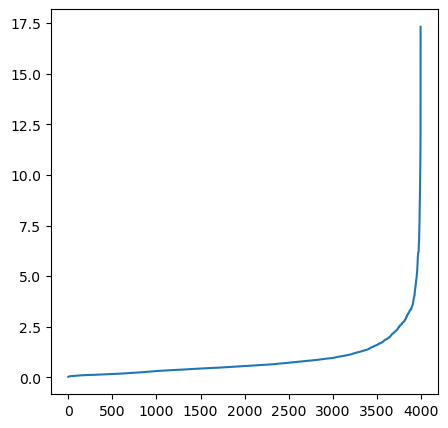

In [102]:
from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(X)

distances ,indices = neighbors.kneighbors(X)
print(distances)

distances = np.sort(distances[:,10], axis=0)

fig = plt.figure(figsize=(5,5))
plt.plot(distances)
plt.Xlabel("Points")
plt.Ylabel("Distance")
plt.grid()

In [105]:
from kneed import KneeLocator
i=np.arange(len(distance))
knee = KneesLocator(i,distances, S=1, curve='convex',direction='increasing',interp_method='polynomial')

fig = plt.figure(figsize=(5,5))
knee.plot_knee()
plt.Xlabel("points")
plt.Ylabe;l("Distance")
plt.grid()

print(distance[knee,knee])

ModuleNotFoundError: No module named 'kneed'

In [106]:
dbscan = DBSCAN(eps=1.5, min_samples=3)
clusters =dbscan.fit_predict(X)

In [107]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [108]:
set(clusters)

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8}

In [ ]:
Airlines['cluster']=dbscan